In [1]:
from data_xml import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Load data

In [2]:
loader=Loader("C:/Users/dexte/Documents/AI/XML_sensors/sensor_P180")
loader2=Loader("C:/Users/dexte/Documents/AI/XML_sensors/sensor_P40")
loader3=Loader("C:/Users/dexte/Documents/AI/XML_sensors/sensor_P120_b")
loader4=Loader("C:/Users/dexte/Documents/AI/XML_sensors/sensor_P80")
frame=loader.getByExperiment()
frame2=loader2.getByExperiment()
frame3=loader3.getByExperiment()
frame4=loader4.getByExperiment()
def gatherTrials(frame):
    vals=max(frame['Trial'])
    dataset=np.zeros((int(vals),100,16))
    for i in range(int(vals)):
        trials=frame[frame['Trial'] == str(i)]
        readings=np.stack(trials["Readings"].apply(np.array))
        #print(readings.shape)
        dataset[i]=readings
    print(dataset.shape)
    return dataset
data_180=gatherTrials(frame)
data_40=gatherTrials(frame2)
data_120=gatherTrials(frame3)
data_80=gatherTrials(frame4)

(999, 100, 16)
(99, 100, 16)
(99, 100, 16)
(99, 100, 16)


## Visualise

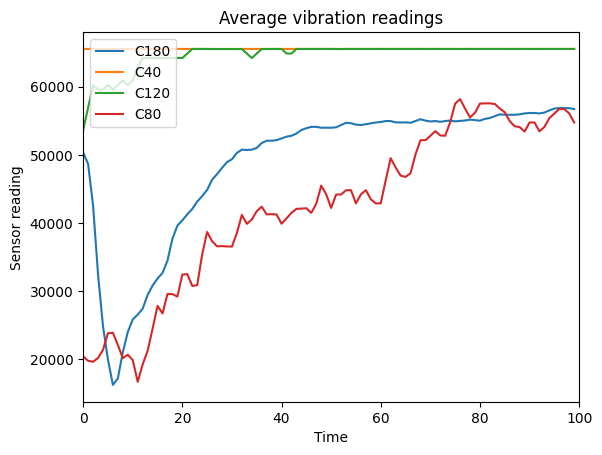

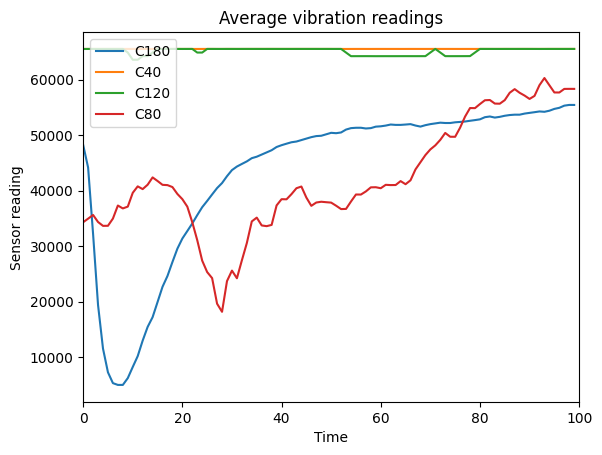

In [3]:
def filter(ar,alpha=0.5):
    ar=ar.T
    smoothed=np.zeros_like(ar)
    smoothed[:,0]=ar[:,0]
    for i in range(len(ar[0])-1):
        smoothed[:,i+1]=ar[:,i+1]*alpha + (1-alpha)*ar[:,i]
    return smoothed
def visualise(trials,labels,title):
    for i,trial in enumerate(trials):
        plt.plot(trial,label=labels[i])
    plt.xlim([0,min([len(trial) for trial in trials])])
    plt.xlabel("Time")
    plt.ylabel("Sensor reading")
    plt.title(title)
    plt.legend(loc="upper left")
    plt.show()

#c180 trials
all_data180=filter(data_180).T

all_data180a=np.average(all_data180[0:len(all_data180)//2],axis=0).T[-1]
all_data180b=np.average(all_data180[len(all_data180)//2:],axis=0).T[-1]
#c40 trials
all_data40=filter(data_40).T
all_data40a=np.average(all_data40[0:len(all_data40)//2],axis=0).T[-1]
all_data40b=np.average(all_data40[len(all_data40)//2:],axis=0).T[-1]
#c120 trials
all_data120=filter(data_120).T
all_data120a=np.average(all_data120[0:len(all_data120)//2],axis=0).T[-1]
all_data120b=np.average(all_data120[len(all_data120)//2:],axis=0).T[-1]
#c80 trials
all_data80=filter(data_80).T
all_data80a=np.average(all_data80[0:len(all_data80)//2],axis=0).T[-1]
all_data80b=np.average(all_data80[len(all_data80)//2:],axis=0).T[-1]
visualise([all_data180a,
           all_data40a,
           all_data120a,
           all_data80a],["C180","C40","C120","C80"],"Average vibration readings")
visualise([all_data180b,
           all_data40b,
           all_data120b,
           all_data80b],["C180","C40","C120","C80"],"Average vibration readings")



C:\Users\dexte\AppData\Local\Temp\ipykernel_2264\1525765272.py:36: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


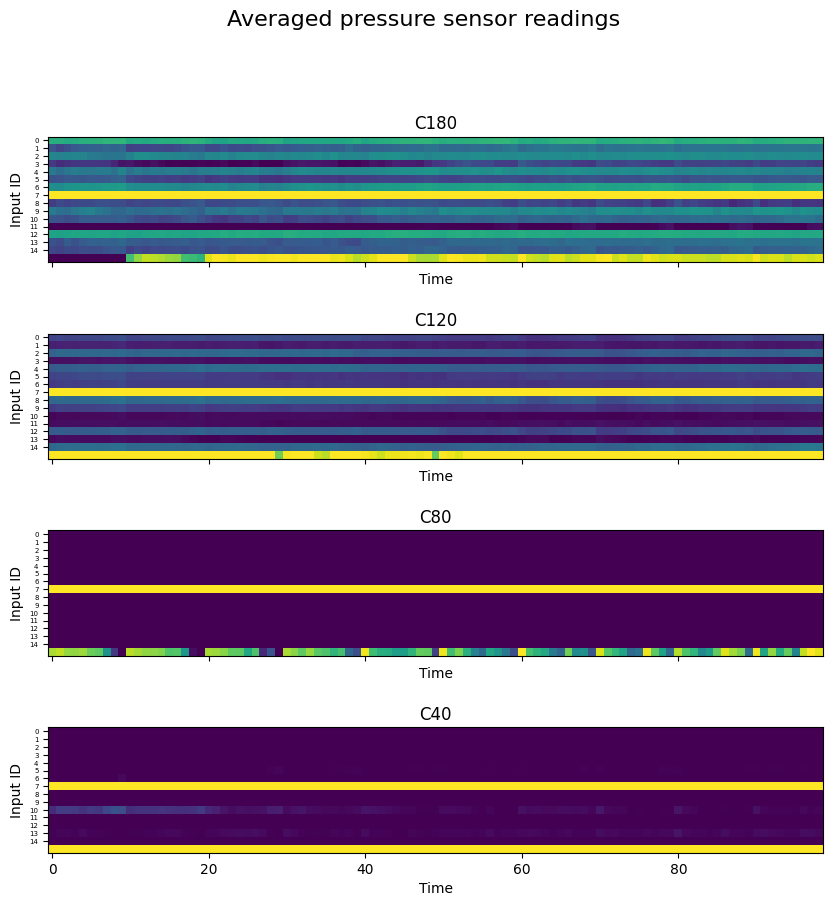

1.0 1.0 0.0 0.0


In [4]:

#c180 trials
all_data180=filter(data_180)
all_data180a=np.average(all_data180,axis=1)
all_data180a=(all_data180a-np.min(all_data180a))/(np.max(all_data180a)-np.min(all_data180a))
#c40 trials
all_data40=filter(data_40)
all_data40a=np.average(all_data40,axis=1)
all_data40a=(all_data40a-np.min(all_data40a))/(np.max(all_data40a)-np.min(all_data40a))
#c120 trials
all_data120=filter(data_120)
all_data120a=np.average(all_data120,axis=1)
all_data120a=(all_data120a-np.min(all_data120a))/(np.max(all_data120a)-np.min(all_data120a))
#c80 trials
all_data80=filter(data_80)
all_data80a=np.average(all_data80,axis=1)
all_data80a=(all_data80a-np.min(all_data80a))/(np.max(all_data80a)-np.min(all_data80a))

fig, axs = plt.subplots(4, 1, figsize=(10, 10), sharex=True, sharey=True, 
                        gridspec_kw={'hspace': 0.1})

axs[0].imshow(all_data180a)            # Display the image in the current subplot
axs[1].imshow(all_data120a)            # Display the image in the current subplot
axs[2].imshow(all_data80a)            # Display the image in the current subplot
axs[3].imshow(all_data40a,vmin=np.min(all_data40a),vmax=np.max(all_data40a))            # Display the image in the current subplot

labels=["C180","C120","C80","C40"]
for i in range(4):
    axs[i].set_title(labels[i])
    axs[i].set_xlabel("Time")
    axs[i].set_ylabel("Input ID")
    axs[i].set_yticks([i for i in range(15)])
    axs[i].tick_params(axis='y', labelsize=5)
plt.suptitle("Averaged pressure sensor readings", fontsize=16)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the subplot
plt.show()
print(np.max(all_data40a),np.max(all_data180a),np.min(all_data40a),np.min(all_data180a))


In [5]:
data_120.shape

(99, 100, 16)

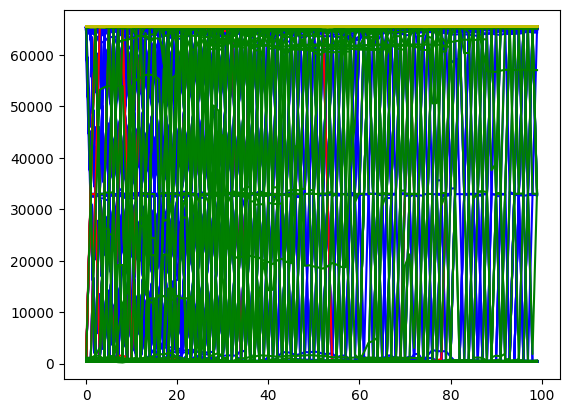

In [6]:

#c180 trials
all_data180=filter(data_180)[0:100][-1]
#c40 trials
all_data40=filter(data_40)[-1]
#c120 trials
all_data120=filter(data_120)[-1]
#c80 trials
all_data80=filter(data_80)[-1]

plt.plot(all_data180,c="b")
plt.plot(all_data120,c="r")
plt.plot(all_data80,c="g")
plt.plot(all_data40,c="y")
plt.show()

## TacTip image dataset

0-0.0-0.9
(9, 100, 480, 640, 3)


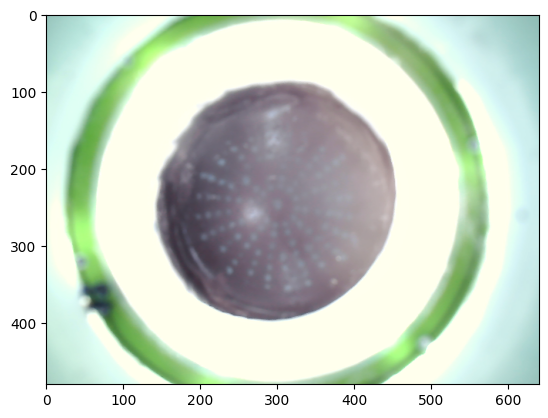

In [42]:
name="TacTip_Flat_P10"
path="C:/Users/dexte/Documents/AI/XML_sensors/"+name+"/"
loader=Loader(path+name+".xml")

frame=loader.getByExperiment(convert=0)
print(frame["Readings"][0])
def gatherTrialsTT(frame):
    vals=max(frame['Trial'])
    dataset=np.zeros((int(vals),100,480, 640, 3))
    for i in range(int(vals)):
        trials=frame[frame['Trial'] == str(i)]
        readings=list(trials["Readings"])[0]
        #print(readings.shape)
        
        data=np.load(path+name+"_"+readings+".npz")
        data=data[list(data.keys())[0]]
        dataset[i]=data.reshape((100,480, 640, 3))
    print(dataset.shape)
    return dataset.astype(np.uint8)
dataTT_flat=gatherTrialsTT(frame)

image_array=dataTT_flat[0][0]
# Scale pixel values to [0, 255] if they are integers
image_array = np.clip(image_array, 0, 255)

plt.imshow(image_array)
plt.show()